## Python in Systems

### Outline
In this lesson, we will learn how to:

Package our application into a command line tool
Explore advanced CLI tools in Python using argparse
Execute other CLI tools in Python to expand capabilities using subprocess
Packaging our application into a command line tool will allow us to develop tools for users who are tech savvy and can execute commands, but may not be developers. Consuming command line tools in our applications will enable us to interface with other languages including legacy software.

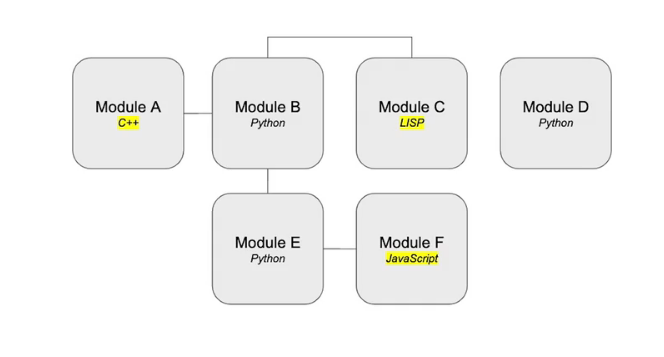

### What is a Command Line Interface?¶
Throughout this course, you've been running commands in a Command-Line Interface (CLI). You've done this anytime you've run a Python script:


$ python3 script.py
A CLI is simply a text-based way of interacting with computer programs. The commands are entered into an interface commonly referred to as a shell or terminal. Instead of Python, CLI scripts use a shell-specific language like BASH. These technologies have been developed since the 1970s and are ubiquitous across most computational platforms.

Most modern software favors Graphical User Interfaces (GUIs) over command-line applications; however, command-line applications are an easy way to quickly package code so that it can be used by savvy users or more easily connected into larger systems.

Note: We'll do a very short review of a few basic BASH commands here, but if you've never used commands like cd, ls, echo, etc. then you might want to check out the Shell Workshop in the Extracurricular section of this course.

Commands and Arguments
The general structure of a command is:


$ {script} {argument0} {argument1} ... {argumentN}
Where the script is the program to execute. This is followed by input arguments, separated by spaces.

Here's an example we've seen before:


$ pip install numpy
In this example, pip is the script and the arguments install and numpy are passed to the pip module.

Note: The $ at the beginning of the line (as in $ pip install numpy) is just the command-line prompt, not something you actually type in as part of the command (Mac and Linux use $, while Windows uses >). Documentation often includes the $ simply to make it clear that the command in question can be executed in a terminal window.

Viewing a command's manual page
If you're ever unsure of how you can use a command line tool, usually you can use something called it's man page (manual page). You can do this by typing man before the command to view it's instructions:


$ man python3
(Tip: You can exit the man page by pressing Ctrl+C.)

Try it:
echo is a simple bash command that prints the first argument passed to it. Try printing helloworld
Access the man page for the clear command (used to clear the terminal window). If you've never used clear before, give it a try—it's quite handy.
The command ls (which stands for list) allows you to view the contents of whatever directory you're currently in. You can also use it to list the contents of a specific directory, by giving the directory as the first argument. Try this out and see if you can view the contents of the welcome_to_bash directory.


$ echo helloworld
$ man clear
$ ls welcome_to_bash/


### Accessing CLI Arguments in Python


Try it:
Import the sys library and replace the name variable with the appropriate argv index.
Add a second argument representing the city and extend the print to include this argument.
Try running python3 cli.py sam 'new york' and make sure you're getting the output: hello, sam from new york. Notice the single quotes in the cli argument to prevent new and york from being passed as two different arguments.

In [ ]:
import sys

name = sys.argv[1]
city = sys.argv[2]

print(f'hello, {name} from {city}')

### Python CLI
In a previous exercise, we've explored basic usage of command-line arguments within Python using the sys module. But we realized there were limitations with this approach. Let's quickly recap.

Optional Practice
The command line is a very useful tool with a tremendous number of applications. We've just gone over some of the basics so you can start using it in your Python projects. A great resource to continue practicing these skills is the Bandit CLI Trainer https://overthewire.org/wargames/bandit/. This game is designed to teach basic security principles and command-line tools. It is a fairly involved game and will take some time to complete, but it will provide a solid foundation.

### Building Better CLI Tools¶

Try it
Practice building more advanced CLI scripts by completing the following tasks:

Replace the sys.argv in the provided code using the argparse module.
Set a default paramater for the city argument.
Read the man page for your CLI tool by running: python3 arg.py --help
Try executing various inputs using python3 arg.py {name} {city}

In [1]:
import argparse

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Say a Greeting.")
    parser.add_argument('name', type=str)
    parser.add_argument('--city', type=str, 
                        default="San Fran", help="where is the person from?")

    args = parser.parse_args()
    name = args.name
    city = args.city
    print(f'Hello, {name} from {city}')

usage: ipykernel_launcher.py [-h] [--city CITY] name
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

/home/pegasus/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Advanced CLI - Subprocess
We now understand how we can make our software accessible from the command line, but what if we wanted to use other software that is available from the command line within our Python application? To accomplish this goal, we can use a Python module called subprocess, which will allow us to interface with software that we'd normally execute from a terminal window.

Some Useful Command Line Tools:
FFMPEG - a useful command-line tool to manipulate videos https://www.ffmpeg.org/
Emoj - a command-line tool to select emojis https://github.com/sindresorhus/emoj
ImageMagick - a command-line tool to manipulate images https://imagemagick.org/index.php 
List of Awesome CLI Apps - a list of many different command-line tools in many different languages https://github.com/agarrharr/awesome-cli-apps

### Using Subprocess¶
Before we start, let's ensure we have emoj installed by running:


npm install --global emoj
Note: The emoj tool is written in javascript and is installed using the node package manager (npm). This can be installed on your system by following these installation instructions.


00:00 / 02:32
1x
CC

Try it!
Install emoj and add the code required to implement subprocess.Popen to call this tool from within our Python script (docs).

Emoji symbols are defined in the UTF-8 character set. Depending on your terminal window you may need to decode your string results using "string".decode('utf-8').

After you have your string in a usable format, extend the code using the random module by splitting the string into a list of emoji and randomly printing one!

SHOW SOLUTION
How does this work?
Let's pause to consider what exactly is happening when we run this code.

When we run Popen, it will execute a child program in a new process. This means it is running outside the context of the Python application, in its own thread. Our Python code will wait for this process to complete and return the raw results, status, or any errors. You can think of this as starting a completely separate application and then using the results—and that separate application can be written in nearly any language.

In [ ]:
import subprocess
import random

p = subprocess.Popen(['emoj', 'dog'], stdout=subprocess.PIPE)
output, err = p.communicate()
p_status = p.wait()

emoji = output.decode('utf-8').split(' ')

print(random.choice(emoji))


Using Subprocess to Interface with CLI Tools¶
We will be building upon a prior exercise. In those exercises we installed the following dependenencies:


pip install -U setuptools
pip install python-docx 
pip install pandas


Try it!
Before starting, make sure you have the xpdf tool installed by running:


sudo apt-get install -y xpdf
Next, try using the command-line tool to convert the pdf into a text file. In the terminal, run:


pdftotext data/cats.pdf tmp/a.txt
cat tmp/a.txt
The first command will convert from pdf to a text file. The second line (which is confusingly overloaded as cat) will concatenate the argument files and print on the standard output. In this case, we provide only the a.txt file so this file's content will be printed to the terminal window.

Finally, create your new PDFImporter class that performs the following steps:

Creates a random filename for the output.
Uses supbrocess to call the pdftotext tool on the input path, saving to the random file.
Uses the Python language reference to open the text file and read it line-by-line.
For each line, parses a new Cat object.
Removes the temporary text file.
Returns the list of cats.

In [ ]:
from typing import List
import subprocess
import os
import random

from .ImportInterface import ImportInterface
from .Cat import Cat

class PDFImporter(ImportInterface):
    allowed_extensions = ['pdf']

    @classmethod
    def parse(cls, path: str) -> List[Cat]:
        if not cls.can_ingest(path):
            raise Exception('Cannot Ingest Exception')

        tmp = f'./tmp/{random.randint(0,1000000)}.txt'
        call = subprocess.call(['pdftotext', path, tmp])

        file_ref = open(tmp, "r")
        cats = []
        for line in file_ref.readlines():
            line = line.strip('\n\r').strip()
            if len(line) > 0:
                parsed = line.split(',')
                new_cat = Cat(parsed[0], 
                              int(parsed[1]), 
                              bool(parsed[2]))
                cats.append(new_cat)

        file_ref.close()
        os.remove(tmp)
        return cats

ython Paths - Data Science
Note: This is an optional reading for students interested in pursuing Python for data science and machine learning—if that's not you, feel free to move on to the next page.

As you continue to develop your Python skills, you may find that you want to focus on a more specialized domain that interests you. One increasingly popular domain involves extracting value from large amounts of data – a discipline widely known as data science. On this page, we'll discuss both data science and the related field of machine learning, so that you can get a better idea of whether these paths are something you want to pursue further.

The Problem
Data is an incredibly valuable resource for almost any company. No matter whether you are a restaurant franchise or a streaming platform, a great deal of your success depends on your ability to make use of data. And in today's world, there's more of that data available than ever before. Large data sets often cannot be analyzed manually—meaning, there's no feasible way to simply look over the data and understand what insights it holds. Instead, the data needs to be processed using computational tools that can reveal the underlying patterns, connections, and trends.

That's where data science comes in. In a data science role, you can expect to use large pools of data to answer important business questions. This could include things like social media profiles of customers, product reviews, or purchase transaction histories. Ultimately the job is broken up into two parts – cleaning data to make it usable, and applying algorithms to draw insight from the cleaned data. A common third step is to then package this entire application into an accessible tool that a business unit can use without the need to understand how the code is implemented.

The Skills You’ve Learned
This lesson simulates the first parts of developing a data science pipeline—getting and processing the data to make it available for use within our software. We’ve explored how we can extract plain text from a variety of documents, which we can then process further in order to get valuable insights. In practice, you’ll apply a similar software design pattern to extract information from other sources (e.g., log files, databases, or the internet). We’ve also learned how we can package our complex code into an easy-to-use interface, which can be used by a team that may not have deep Python skills.

The Next Steps – Extracting Insight
After we have the data in a usable form, we then need to analyze it and extract insights. In the past, this was largely done through statistical analysis—for example, by taking mathematical models and applying them to the data to predict future trends. This approach certainly still has value, but in more recent years, we've seen that we can often obtain much better models—and much better predictions—through machine learning.

In machine learning, we can apply advanced algorithms to find hidden patterns, connections, and trends in large data sets. These patterns often don't fit simple statistical models, but are often better at predicting future events. For example, many streaming services use machine learning algorithms to better predict what movies you might like.

Python is a good tool for both of these applications—it has excellent libraries for both conventional statistical analysis and machine learning, so the foundations you've learned in this course will serve you well if you decide to go in either of these directions.

More on Machine Learning
Currently, the machine-learning space is broken up into three main areas:

Applied machine learning
Machine learning as a service
Custom solutions
Applied Machine Learning
Python libraries for applied machine learning include pre-trained models that you can use out of the box. These algorithms reduce the complexity needed to extract value from systems. For example, you may require an image recognition system to find specific photos in a large pool of photos (an area of machine learning known as computer vision). Alternatively, you may need to find all of the mentions of your product in a large pool of tweets and understand if there is a positive or negative sentiment (an area known as natural language processing). As you'll see if you peruse the articles linked below, these solutions are easy to implement using applied machine learning techniques:

Image Recognition using Libraries https://towardsdatascience.com/train-image-recognition-ai-with-5-lines-of-code-8ed0bdd8d9ba
Classify Text Using spaCy https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

Machine Learning as a Service
Other tasks can be performed using services that are designed to process your data in a larger system. This outsources the development of the complex algorithms and training to a 3rd party so you can focus on your data and your application. Amazon, Google, Microsoft, and other large tech vendors offer solutions as a service:

Machine Learning on Amazon Web Services https://aws.amazon.com/machine-learning/
AI on Google Cloud https://cloud.google.com/products/ai/

Custom Solutions
For more complex, specialized problems you may need to develop custom models. This is the most advanced way to leverage machine learning in your systems. It requires a deep understanding of the various algorithms you can choose for different problem types and the techniques you’ll need to train your models. Data is beautiful, and despite the complexity, it is worth the effort to dive into the world of Machine Learning using Python:

SciKit-Learn Supervised Learning https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html
TensorFlow https://www.tensorflow.org/learn

### Continue Learning
If you think data science or machine learning is a path you might want to pursue, you'll now have the fundamental Python skills to get started. There are many great resources now available. Here are a few that we recommend:

Data Analyst Nanodegree https://www.udacity.com/course/data-analyst-nanodegree--nd002
Introduction to Machine Learning https://www.udacity.com/course/intro-to-machine-learning-nanodegree--nd229


